<a href="https://colab.research.google.com/github/aryab04/Decision_tree_classifier/blob/main/Wine_type_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [4]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<Axes: >

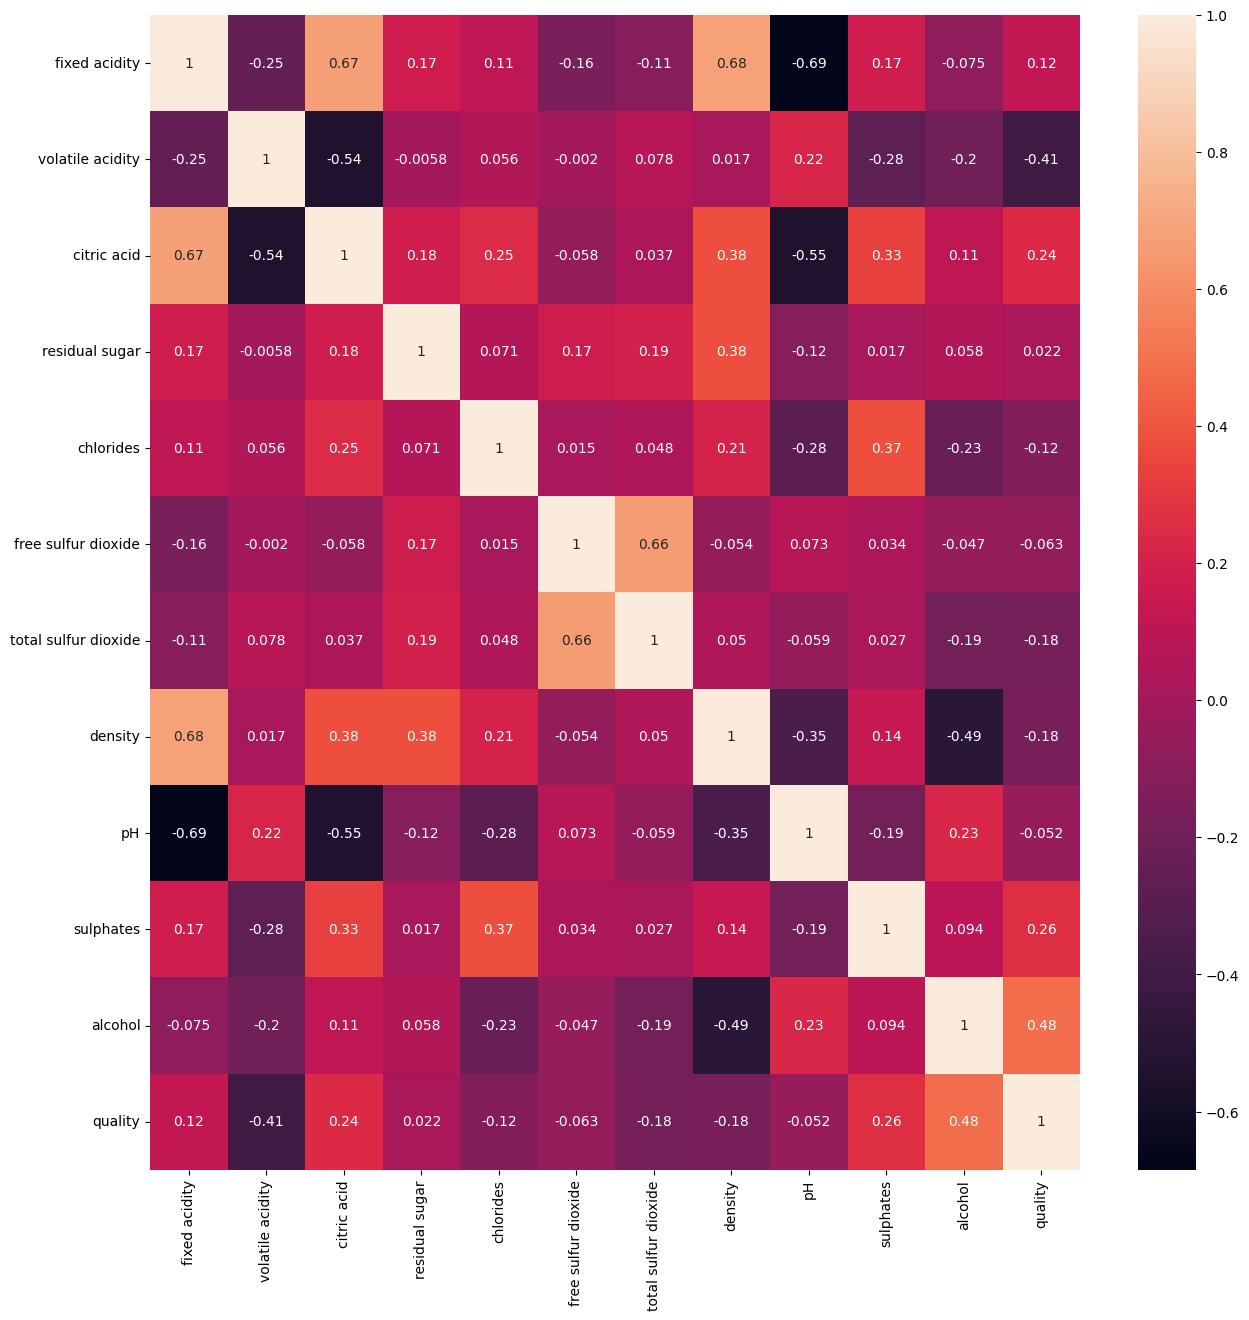

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<ipython-input-17-52a4a49dcd39>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

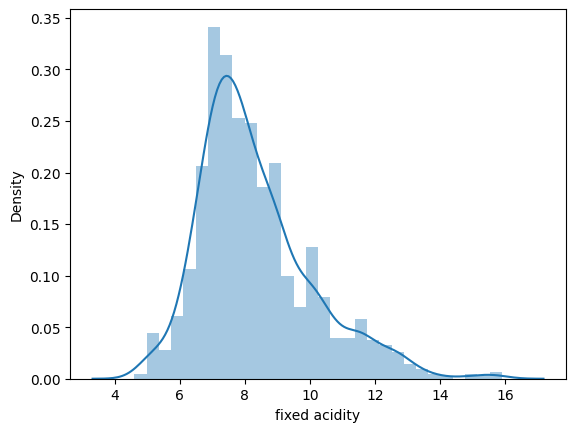

In [17]:
sns.distplot(df['fixed acidity'])

In [18]:
x=df.drop('quality',axis=1)
y=df.quality

In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [20]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


In [23]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((914, 11), (229, 11), (914,), (229,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=model.predict(x_test)
y_pred

array([4, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 4, 5, 6, 7, 5,
       5, 6, 4, 5, 7, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       5, 6, 7, 7, 5, 6, 6, 5, 5, 7, 6, 6, 5, 7, 7, 5, 5, 6, 6, 7, 7, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 4, 5, 5, 6, 5, 6,
       7, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 4, 5, 6, 5, 5, 6, 6, 6, 7,
       7, 5, 5, 5, 4, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 5,
       7, 6, 7, 4, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 6, 4,
       6, 5, 5, 5, 7, 6, 5, 5, 4, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 7, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       7, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 8, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5,
       7, 6, 5, 5, 4, 7, 6, 6, 6])

[Text(0.5203033268101761, 0.9736842105263158, 'x[10] <= 10.35\ngini = 0.645\nsamples = 914\nvalue = [6, 27, 387, 363, 117, 14]'),
 Text(0.27644936399217224, 0.9210526315789473, 'x[9] <= 0.585\ngini = 0.53\nsamples = 497\nvalue = [5, 17, 302, 156, 15, 2]'),
 Text(0.13625244618395305, 0.868421052631579, 'x[5] <= 24.5\ngini = 0.409\nsamples = 232\nvalue = [3, 9, 172, 46, 2, 0]'),
 Text(0.08268101761252446, 0.8157894736842105, 'x[2] <= 0.175\ngini = 0.464\nsamples = 177\nvalue = [3, 7, 122, 43, 2, 0]'),
 Text(0.03522504892367906, 0.7631578947368421, 'x[0] <= 8.7\ngini = 0.385\nsamples = 87\nvalue = [2, 4, 67, 12, 2, 0]'),
 Text(0.025440313111545987, 0.7105263157894737, 'x[10] <= 9.15\ngini = 0.319\nsamples = 82\nvalue = [2, 2, 67, 9, 2, 0]'),
 Text(0.01761252446183953, 0.6578947368421053, 'x[3] <= 1.85\ngini = 0.64\nsamples = 5\nvalue = [0, 2, 1, 2, 0, 0]'),
 Text(0.0136986301369863, 0.6052631578947368, 'x[9] <= 0.505\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]'),
 Text(0.009784

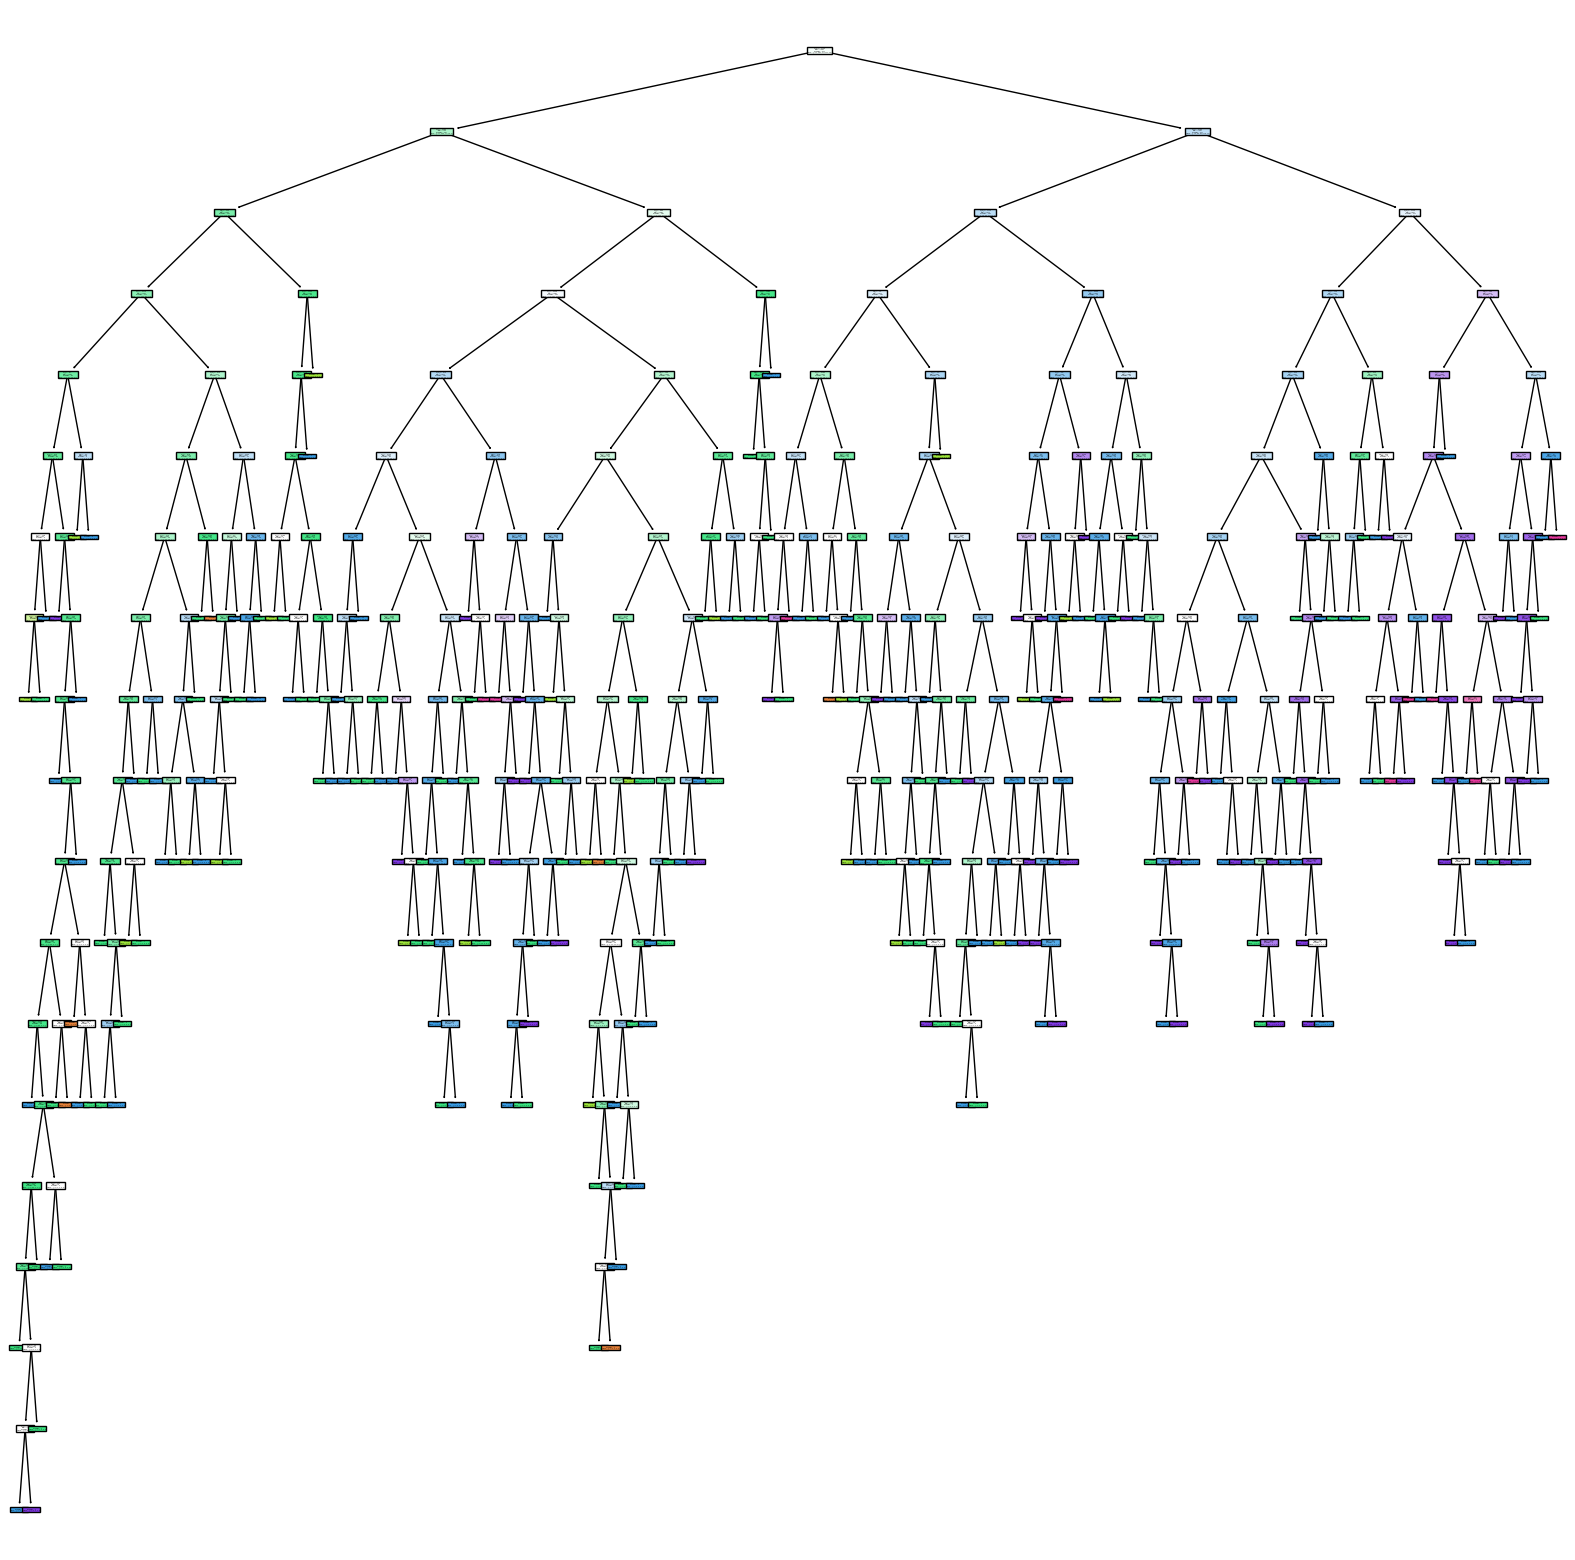

In [32]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True)

In [34]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.5414847161572053

In [36]:
print(classification_report(y_test,y_pred,target_names=['C1','C2','C3','C4','C5']))

              precision    recall  f1-score   support

          C1       0.09      0.17      0.12         6
          C2       0.65      0.60      0.63        96
          C3       0.53      0.53      0.53        99
          C4       0.45      0.50      0.47        26
          C5       0.00      0.00      0.00         2

    accuracy                           0.54       229
   macro avg       0.34      0.36      0.35       229
weighted avg       0.55      0.54      0.55       229

